# **Text Data - Sentiment Analysis**


## **Data Description**
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


## **Data includes:**


*   Reviews from Oct 1999 - Oct 2012 - 568,454 reviews

*   256,059 Users and 74,258 products

*   260 users with > 50 reviews



## **Problem Statement :**

**The aim here will be to predict the score for the given text review by an individual for the product he brought on amazon.**\









### **Create DataFrame from raw text files**

In [ ]:
import pandas as pd
import numpy as np

import re
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [ ]:
!unzip '/content/drive/MyDrive/txt_reviews.zip'

Streaming output truncated to the last 5000 lines.
  inflating: txt_reviews/review_95499.txt  
  inflating: txt_reviews/review_955.txt  
  inflating: txt_reviews/review_9550.txt  
  inflating: txt_reviews/review_95500.txt  
  inflating: txt_reviews/review_95501.txt  
  inflating: txt_reviews/review_95502.txt  
  inflating: txt_reviews/review_95503.txt  
  inflating: txt_reviews/review_95504.txt  
  inflating: txt_reviews/review_95505.txt  
  inflating: txt_reviews/review_95506.txt  
  inflating: txt_reviews/review_95507.txt  
  inflating: txt_reviews/review_95508.txt  
  inflating: txt_reviews/review_95509.txt  
  inflating: txt_reviews/review_9551.txt  
  inflating: txt_reviews/review_95510.txt  
  inflating: txt_reviews/review_95511.txt  
  inflating: txt_reviews/review_95512.txt  
  inflating: txt_reviews/review_95513.txt  
  inflating: txt_reviews/review_95514.txt  
  inflating: txt_reviews/review_95515.txt  
  inflating: txt_reviews/review_95516.txt  
  inflating: txt_reviews/revi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
filename=os.listdir('/content/txt_reviews')

In [ ]:
print(len(filename))

568454


In [ ]:
Product_id=[]
User_id=[]
Profile_Name=[]
Helpfulness_Numerator=[]
Helpfulness_Denominator=[]
Score=[]
Time=[]
Review_Summary=[]
Review_Text=[]


for review in filename:
    with open(('/content/txt_reviews/'+review),'r') as f:
        lines = f.readlines()
        Product_id.append(lines[0].split(":")[1].strip('\n'))
        User_id.append(lines[1].split(":")[1].strip('\n'))
        Profile_Name.append(lines[2].split(":")[1].strip('\n'))
        Helpfulness_Numerator.append(lines[3].split(":")[1].strip('\n'))
        Helpfulness_Denominator.append(lines[4].split(":")[1].strip('\n'))
        Score.append(lines[5].split(":")[1].strip('\n'))
        Time.append(lines[6].split(":")[1].strip('\n'))
        Review_Summary.append(lines[7].split(":")[1].strip('\n'))
        Review_Text.append(lines[8].split(":")[1].strip('\n'))



nlp_df=pd.DataFrame({"Product_id":Product_id,"User_id":User_id,"Profile_Name":Profile_Name,"Helpfulness_Numerator":Helpfulness_Numerator,"Helpfulness_Denominator":Helpfulness_Denominator,
                   "Score":Score,"Time":Time,"Review_Summary":Review_Summary,"Review_Text":Review_Text})

### **Load the data and perform the basic EDA to understand the data.**

In [ ]:
nlp_df

,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B001PMC3QG,AZ65W8C4CPKST,Sally,1,1,5,1240444800,"excellent, healthy dogfood",I was looking to change my dog's canned food ...
1,B000LKU3DI,A10QVHHPD3GY6R,moose_angel,0,0,4,1337212800,The Best I've Found So Far,"Okay, these are pretty darn tasty. I have tr..."
2,B006Y02OZO,A17726SLS6D5RR,Carolyn,4,5,4,1323820800,NOTICE HOW small THE BOX IS!!!,I didn't pay attention when I ordered these j...
3,B000KJVIOI,A1RSFFHS7TYBKZ,m,4,4,4,1326240000,costco cheaper,The product was for my girl friend. The choco...
4,B003ZXFWP2,A3MDETK0D5UAIN,"xoxo ""woodfairy""",0,0,5,1340841600,Best Snack You Can Buy!,"If you have not tasted these, then you do not..."
...,...,...,...,...,...,...,...,...,...
568449,B000EDG598,A2D95KT35FSHE9,S. Leiker,9,9,5,1217116800,gluten free,My family (even the non-celiacs) liked this a...
568450,B008ZRKZSM,APPOI8A1QSKEF,J. Lyon,5,5,3,1309910400,"Very good in smoothies, but why the short she...",I really like the taste of this powder. It i...
568451,B000E4ARAU,ATHGA4EWDNI9H,Kate the Elder,1,1,4,1164067200,Even better than the teriyaki flavor.,"This brand is properly cut across the grain, ..."
568452,B000NMFY24,AC0KUSLV2Z765,Kansas Boy,3,4,5,1194307200,Delivery was very fast,Product was fresh and arrived fast. Packed w...


In [ ]:
# Converting DataFrame to CSV formate

In [ ]:
nlp_df.to_csv('/content/txt_reviews.csv')

In [ ]:
# Loading the converted DataFrame

In [ ]:
nlp_df1=pd.read_csv(r"/content/txt_reviews.csv")

### **Performing a basic Exploratory Data Analysis to understand the data**

In [ ]:
nlp_df1.head()

,Unnamed: 0,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,0,B001PMC3QG,AZ65W8C4CPKST,Sally,1,1,5,1240444800,"excellent, healthy dogfood",I was looking to change my dog's canned food ...
1,1,B000LKU3DI,A10QVHHPD3GY6R,moose_angel,0,0,4,1337212800,The Best I've Found So Far,"Okay, these are pretty darn tasty. I have tr..."
2,2,B006Y02OZO,A17726SLS6D5RR,Carolyn,4,5,4,1323820800,NOTICE HOW small THE BOX IS!!!,I didn't pay attention when I ordered these j...
3,3,B000KJVIOI,A1RSFFHS7TYBKZ,m,4,4,4,1326240000,costco cheaper,The product was for my girl friend. The choco...
4,4,B003ZXFWP2,A3MDETK0D5UAIN,"xoxo ""woodfairy""",0,0,5,1340841600,Best Snack You Can Buy!,"If you have not tasted these, then you do not..."


In [ ]:
nlp_df1.tail()

,Unnamed: 0,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
568449,568449,B000EDG598,A2D95KT35FSHE9,S. Leiker,9,9,5,1217116800,gluten free,My family (even the non-celiacs) liked this a...
568450,568450,B008ZRKZSM,APPOI8A1QSKEF,J. Lyon,5,5,3,1309910400,"Very good in smoothies, but why the short she...",I really like the taste of this powder. It i...
568451,568451,B000E4ARAU,ATHGA4EWDNI9H,Kate the Elder,1,1,4,1164067200,Even better than the teriyaki flavor.,"This brand is properly cut across the grain, ..."
568452,568452,B000NMFY24,AC0KUSLV2Z765,Kansas Boy,3,4,5,1194307200,Delivery was very fast,Product was fresh and arrived fast. Packed w...
568453,568453,B000WFPJIG,A1RA68NKGP5LK6,Margarita Man,6,7,5,1291075200,great for food allergies,I used to feed my two cats Meow Mix dry food ...


In [ ]:
# check for any corrupted data by `df.info()` check weahther all the features are having the correct data type

In [ ]:
nlp_df1.info() # the data types of all the features are correct but we are haing unwanted characters which will be removed during cleaning #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               568454 non-null  int64 
 1   Product_id               568454 non-null  object
 2   User_id                  568454 non-null  object
 3   Profile_Name             568454 non-null  object
 4   Helpfulness_Numerator    568454 non-null  int64 
 5   Helpfulness_Denominator  568454 non-null  int64 
 6   Score                    568454 non-null  int64 
 7   Time                     568454 non-null  int64 
 8   Review_Summary           568454 non-null  object
 9   Review_Text              568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
# Check for Duplicates in our dataset

In [ ]:
nlp_df1.duplicated().value_counts() # As we can see that there are no duplicated records in our dataset

False    568454
dtype: int64

In [ ]:
# Check for missing values

In [ ]:
nlp_df1.isna().sum() # As we can see that there are no missing the values in our dataset

Unnamed: 0                 0
Product_id                 0
User_id                    0
Profile_Name               0
Helpfulness_Numerator      0
Helpfulness_Denominator    0
Score                      0
Time                       0
Review_Summary             0
Review_Text                0
dtype: int64

# **Check for Outliers**

## **Skewness:**

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed



*   Less than -1 or greater than 1, then the distribution is highly skewed.
*   Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.

*   Between -0.5 and 0.5, then the distribution is approx. symmetric.
*   When skewness = 0, then the data is perfrctly symmetric.














In [ ]:
nlp_df1.columns # to view the columns

Index(['Unnamed: 0', 'Product_id', 'User_id', 'Profile_Name',
       'Helpfulness_Numerator', 'Helpfulness_Denominator', 'Score', 'Time',
       'Review_Summary', 'Review_Text'],
      dtype='object')

In [ ]:
nlp_df1.drop(['Unnamed: 0'] , axis = 1, inplace = True)
nlp_df1 # Unwanted column is droped


,Product_id,User_id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B001PMC3QG,AZ65W8C4CPKST,Sally,1,1,5,1240444800,"excellent, healthy dogfood",I was looking to change my dog's canned food ...
1,B000LKU3DI,A10QVHHPD3GY6R,moose_angel,0,0,4,1337212800,The Best I've Found So Far,"Okay, these are pretty darn tasty. I have tr..."
2,B006Y02OZO,A17726SLS6D5RR,Carolyn,4,5,4,1323820800,NOTICE HOW small THE BOX IS!!!,I didn't pay attention when I ordered these j...
3,B000KJVIOI,A1RSFFHS7TYBKZ,m,4,4,4,1326240000,costco cheaper,The product was for my girl friend. The choco...
4,B003ZXFWP2,A3MDETK0D5UAIN,"xoxo ""woodfairy""",0,0,5,1340841600,Best Snack You Can Buy!,"If you have not tasted these, then you do not..."
...,...,...,...,...,...,...,...,...,...
568449,B000EDG598,A2D95KT35FSHE9,S. Leiker,9,9,5,1217116800,gluten free,My family (even the non-celiacs) liked this a...
568450,B008ZRKZSM,APPOI8A1QSKEF,J. Lyon,5,5,3,1309910400,"Very good in smoothies, but why the short she...",I really like the taste of this powder. It i...
568451,B000E4ARAU,ATHGA4EWDNI9H,Kate the Elder,1,1,4,1164067200,Even better than the teriyaki flavor.,"This brand is properly cut across the grain, ..."
568452,B000NMFY24,AC0KUSLV2Z765,Kansas Boy,3,4,5,1194307200,Delivery was very fast,Product was fresh and arrived fast. Packed w...


In [ ]:
nlp_df1.skew() # check for the Skewness to see if there are any presence of outliers:

Helpfulness_Numerator      37.521614
Helpfulness_Denominator    32.632886
Score                      -1.460985
Time                       -1.228063
dtype: float64

# **Intuitions:**



*  As we can see that features Helpfulness_Numerator, Helpfulness_Denominator is having a skewness of far greater than one and
*  Hence the distribution is highly skewed ( Mean is far away from Median) and outliers are present.

*   The features Score,Time having skewness slightly less than -1. Hence they are also having the outliers.






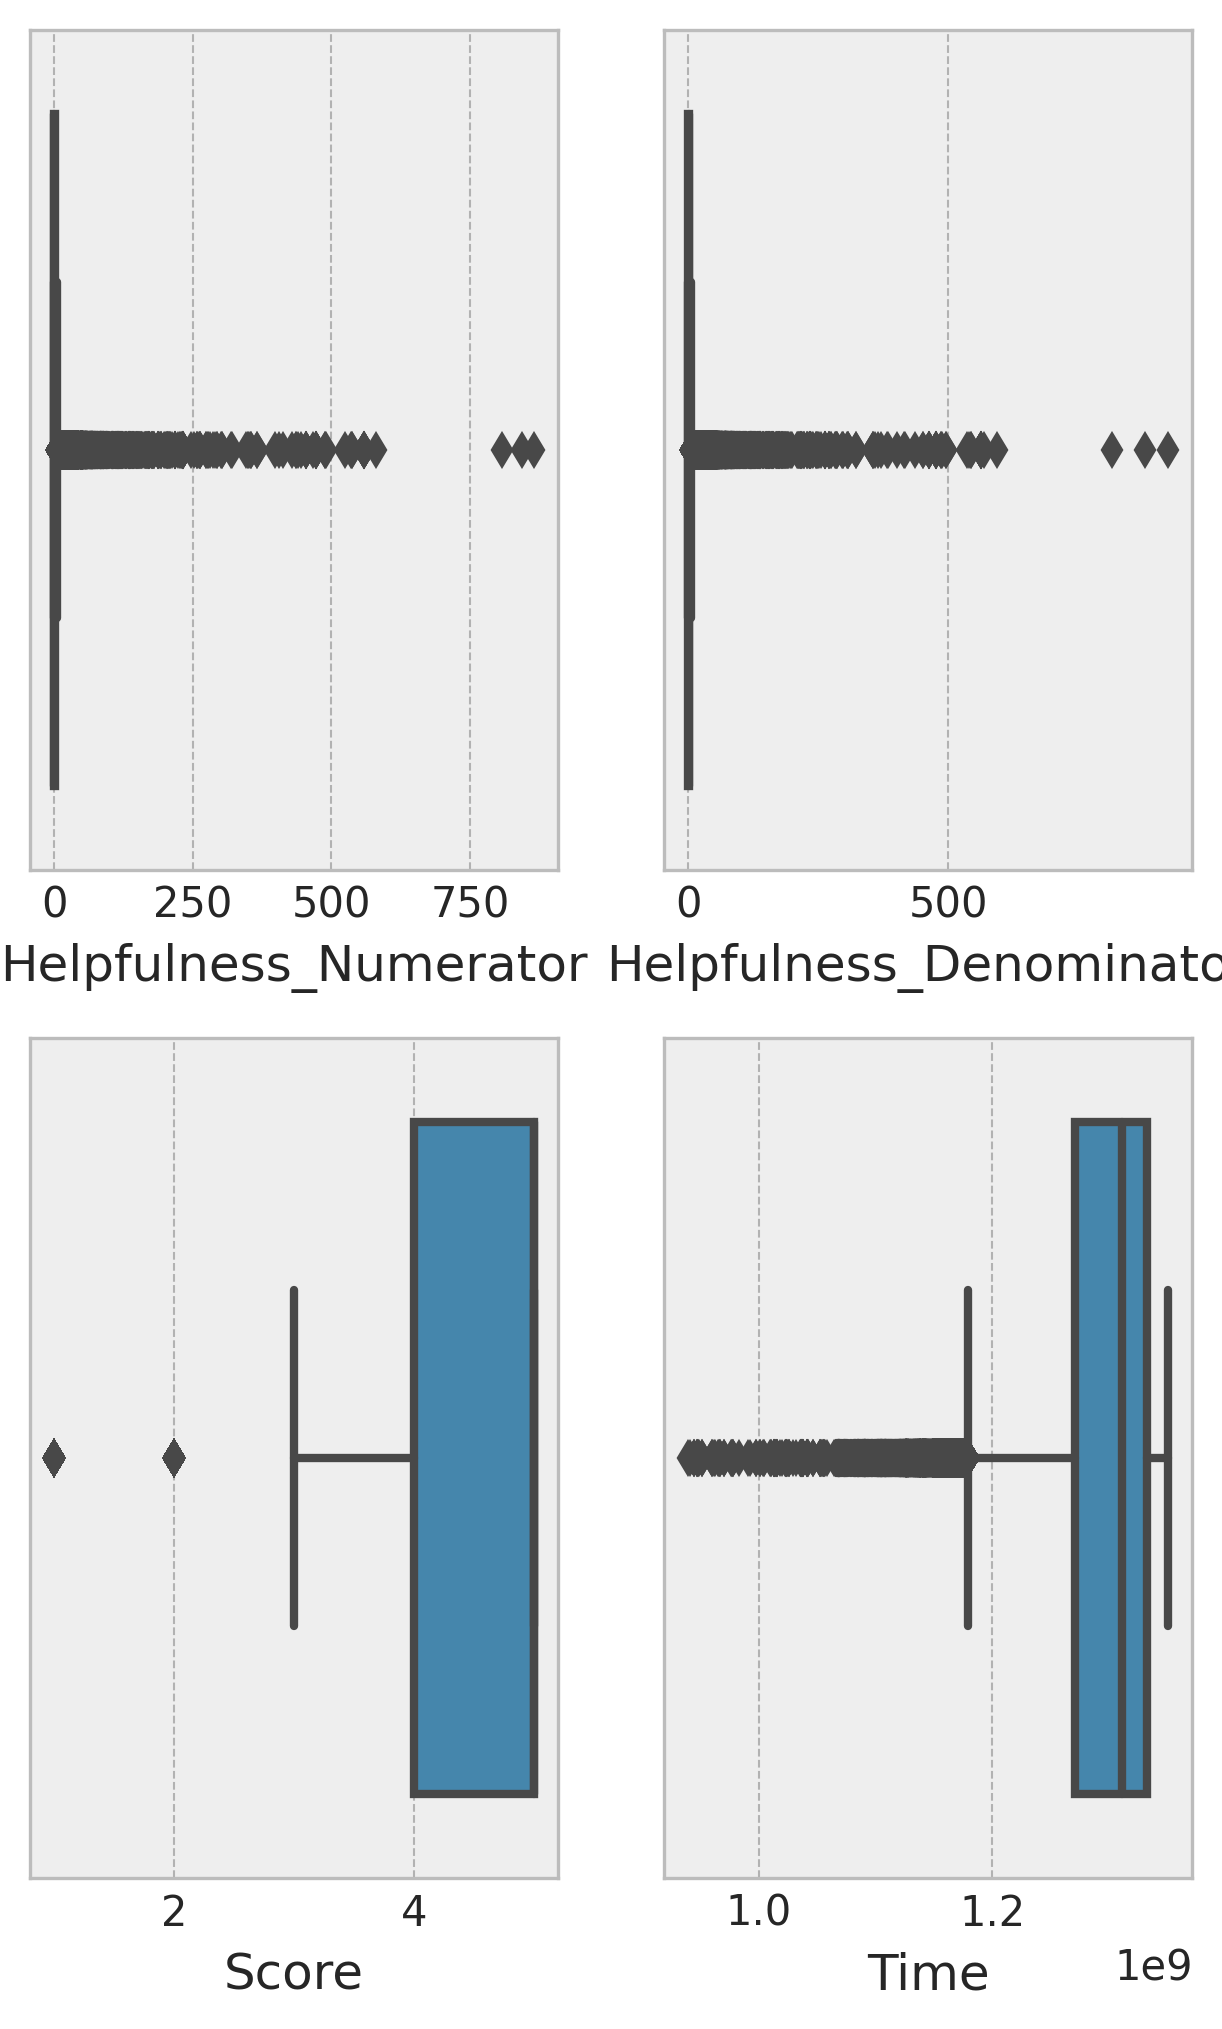

In [ ]:
# View the outliers through visualization
# Drawing the boxplot
plt.figure(figsize=(5,8), dpi = 150)
plt.subplot(221)
sns.boxplot(x= 'Helpfulness_Numerator', data=nlp_df1);
plt.subplot(222)
sns.boxplot(x= 'Helpfulness_Denominator', data=nlp_df1);
plt.subplot(223)
sns.boxplot(x= 'Score', data=nlp_df1);
plt.subplot(224)
sns.boxplot(x= 'Time', data=nlp_df1);

## **Note**
For the given Text Data - Sentiment Analysis we only require Review_Text and Score for the Model Building which will predict the score for the given text review

# **Build a model**

Task A - Perform data preprocessing on the given text data and convert it into numerical vectors.

In [ ]:
nlp = nlp_df1[['Review_Text','Score']]

In [ ]:
nlp.head()

,Review_Text,Score
0,I was looking to change my dog's canned food ...,5
1,"Okay, these are pretty darn tasty. I have tr...",4
2,I didn't pay attention when I ordered these j...,4
3,The product was for my girl friend. The choco...,4
4,"If you have not tasted these, then you do not...",5


In [ ]:
y = nlp['Score']
X = nlp[['Review_Text']]

In [ ]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [ ]:
X_train.head()

,Review_Text
67866,my wife and i have been drinking this coffee ...
122434,Don't buy this unless you want decaf. Inform...
553789,These are just like the ones that Lammes cand...
356935,"Followed the instructions on the package, and..."
351597,In my humble opinion this is the very best ma...


In [ ]:
X_train.shape

(397917, 1)

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [ ]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [ ]:
def pre_Processor(Raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", Raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
# # Convert to series
temp =X_train['Review_Text'].apply(lambda x: pre_Processor(x, 'stem'))

In [ ]:
temp.head()

,0,1
67866,wife drink coffe yr found none better use home...,12
122434,buy unless want decaf inform well packag said ...,20
553789,like one lamm candi use carri happi found wonder,9
356935,follow instruct packag turn pretti good hit in...,15
351597,humbl opinion best marinad jerk meat shrimp fi...,31


In [ ]:
temp.columns = ['clean_Reviewtext_stem', 'Reviewtext_length_stem']

temp.head()

,clean_Reviewtext_stem,Reviewtext_length_stem
67866,wife drink coffe yr found none better use home...,12
122434,buy unless want decaf inform well packag said ...,20
553789,like one lamm candi use carri happi found wonder,9
356935,follow instruct packag turn pretti good hit in...,15
351597,humbl opinion best marinad jerk meat shrimp fi...,31


In [ ]:
X_test.head()

,Review_Text
438256,I got them at Wall-Mart for $1.83 a box. With...
362810,These are the only dog treats I know of that ...
33030,"I was excited about receiving decaf tea, but ..."
486713,The Baby Gourmet Organic Simple Purees Stage ...
39460,"I had a hard time drinking this with water, j..."


In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [ ]:
temp1 = X_test['Review_Text'].progress_apply(lambda x: pre_Processor(x, 'stem'))

temp1.head()

100%|██████████| 170537/170537 [30:14<00:00, 93.98it/s]


,0,1
438256,got wall mart box subscrib save would cost get...,19
362810,dog treat know smell like wonder cooki human h...,22
33030,excit receiv decaf tea tast absolut horribl ev...,31
486713,babi gourmet organ simpl pure stage month plu ...,44
39460,hard time drink water juic anyth els put scoop...,27


In [ ]:
temp1.columns = ['clean_Reviewtext_stem', 'Reviewtext_length_stem']

temp1.head()

,clean_Reviewtext_stem,Reviewtext_length_stem
438256,got wall mart box subscrib save would cost get...,19
362810,dog treat know smell like wonder cooki human h...,22
33030,excit receiv decaf tea tast absolut horribl ev...,31
486713,babi gourmet organ simpl pure stage month plu ...,44
39460,hard time drink water juic anyth els put scoop...,27


In [ ]:
X_train = pd.concat([X_train, temp], axis=1)

X_train.head()

,Review_Text,clean_Reviewtext_stem,Reviewtext_length_stem
67866,my wife and i have been drinking this coffee ...,wife drink coffe yr found none better use home...,12
122434,Don't buy this unless you want decaf. Inform...,buy unless want decaf inform well packag said ...,20
553789,These are just like the ones that Lammes cand...,like one lamm candi use carri happi found wonder,9
356935,"Followed the instructions on the package, and...",follow instruct packag turn pretti good hit in...,15
351597,In my humble opinion this is the very best ma...,humbl opinion best marinad jerk meat shrimp fi...,31


In [ ]:
X_test = pd.concat([X_test, temp1], axis=1)

X_test.head()

,Review_Text,clean_Reviewtext_stem,Reviewtext_length_stem
438256,I got them at Wall-Mart for $1.83 a box. With...,got wall mart box subscrib save would cost get...,19
362810,These are the only dog treats I know of that ...,dog treat know smell like wonder cooki human h...,22
33030,"I was excited about receiving decaf tea, but ...",excit receiv decaf tea tast absolut horribl ev...,31
486713,The Baby Gourmet Organic Simple Purees Stage ...,babi gourmet organ simpl pure stage month plu ...,44
39460,"I had a hard time drinking this with water, j...",hard time drink water juic anyth els put scoop...,27


## **Converting Text to Numerical vectors - BOW Representation**

In [ ]:
X_train.head()

,Review_Text,clean_Reviewtext_stem,Reviewtext_length_stem
67866,my wife and i have been drinking this coffee ...,wife drink coffe yr found none better use home...,12
122434,Don't buy this unless you want decaf. Inform...,buy unless want decaf inform well packag said ...,20
553789,These are just like the ones that Lammes cand...,like one lamm candi use carri happi found wonder,9
356935,"Followed the instructions on the package, and...",follow instruct packag turn pretti good hit in...,15
351597,In my humble opinion this is the very best ma...,humbl opinion best marinad jerk meat shrimp fi...,31


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_Reviewtext_stem'])

In [ ]:
X_train_bow

<397917x60563 sparse matrix of type '<class 'numpy.int64'>'
	with 11694030 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 60563
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (397917, 60563)


In [ ]:
X_test_bow = vocab.transform(X_test['clean_Reviewtext_stem'])

In [ ]:
X_test_bow

<170537x60563 sparse matrix of type '<class 'numpy.int64'>'
	with 4989083 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_test_bow))

print("Shape of input data:", X_test_bow.shape)

Total unique words: 60563
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (170537, 60563)


## **Task B - Build models to predict the Score of a given text review.**

### **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X_train_bow, y_train)

LogisticRegression()

In [ ]:
y_test_pred = classifier1.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred))

0.7279476008138996
              precision    recall  f1-score   support

           1       0.64      0.64      0.64     15644
           2       0.43      0.21      0.29      9048
           3       0.44      0.28      0.34     12796
           4       0.51      0.23      0.31     24189
           5       0.78      0.95      0.86    108860

    accuracy                           0.73    170537
   macro avg       0.56      0.46      0.49    170537
weighted avg       0.69      0.73      0.69    170537



In [ ]:
LR_ac = accuracy_score(y_test, y_test_pred)

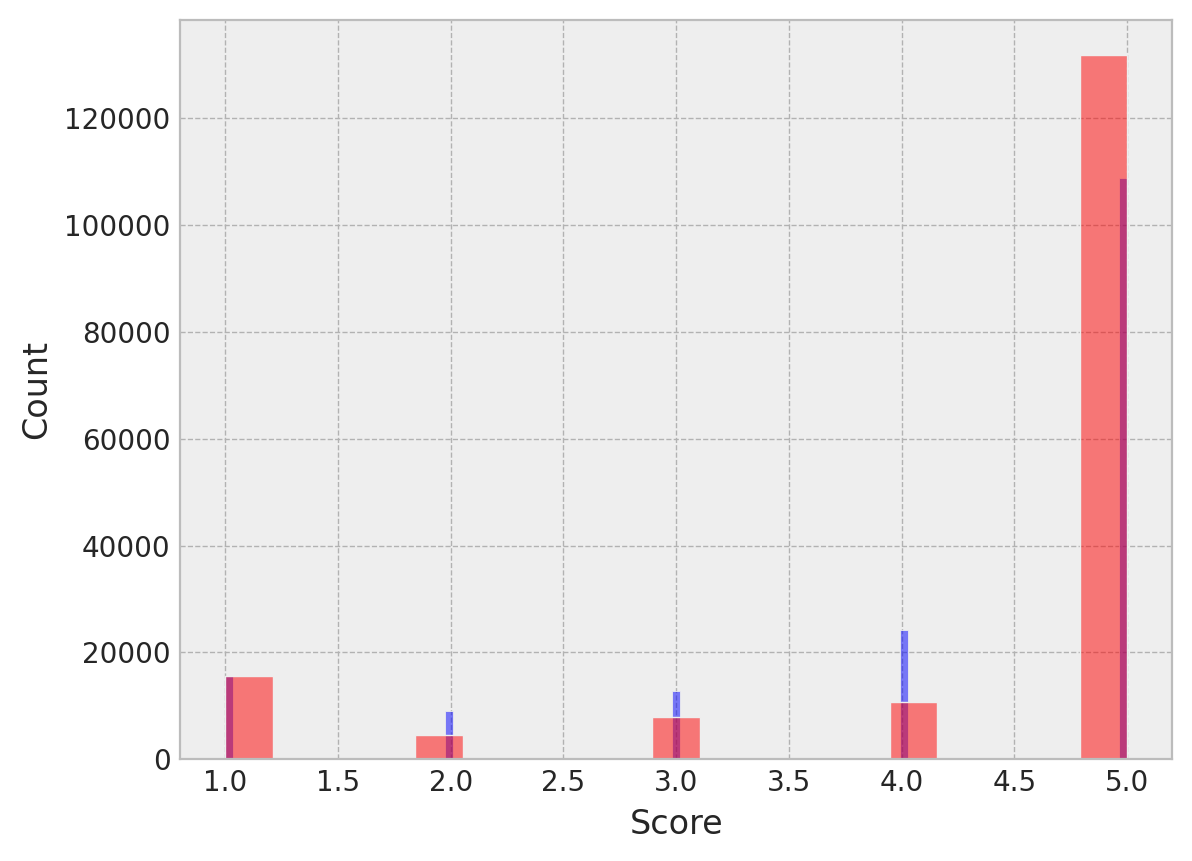

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### **Decision Tree Classifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred1 = classifier2.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred1)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred1))

0.7441024528401461
              precision    recall  f1-score   support

           1       0.62      0.61      0.62     15644
           2       0.51      0.44      0.47      9048
           3       0.52      0.48      0.50     12796
           4       0.55      0.51      0.53     24189
           5       0.84      0.87      0.86    108860

    accuracy                           0.74    170537
   macro avg       0.61      0.58      0.59    170537
weighted avg       0.74      0.74      0.74    170537



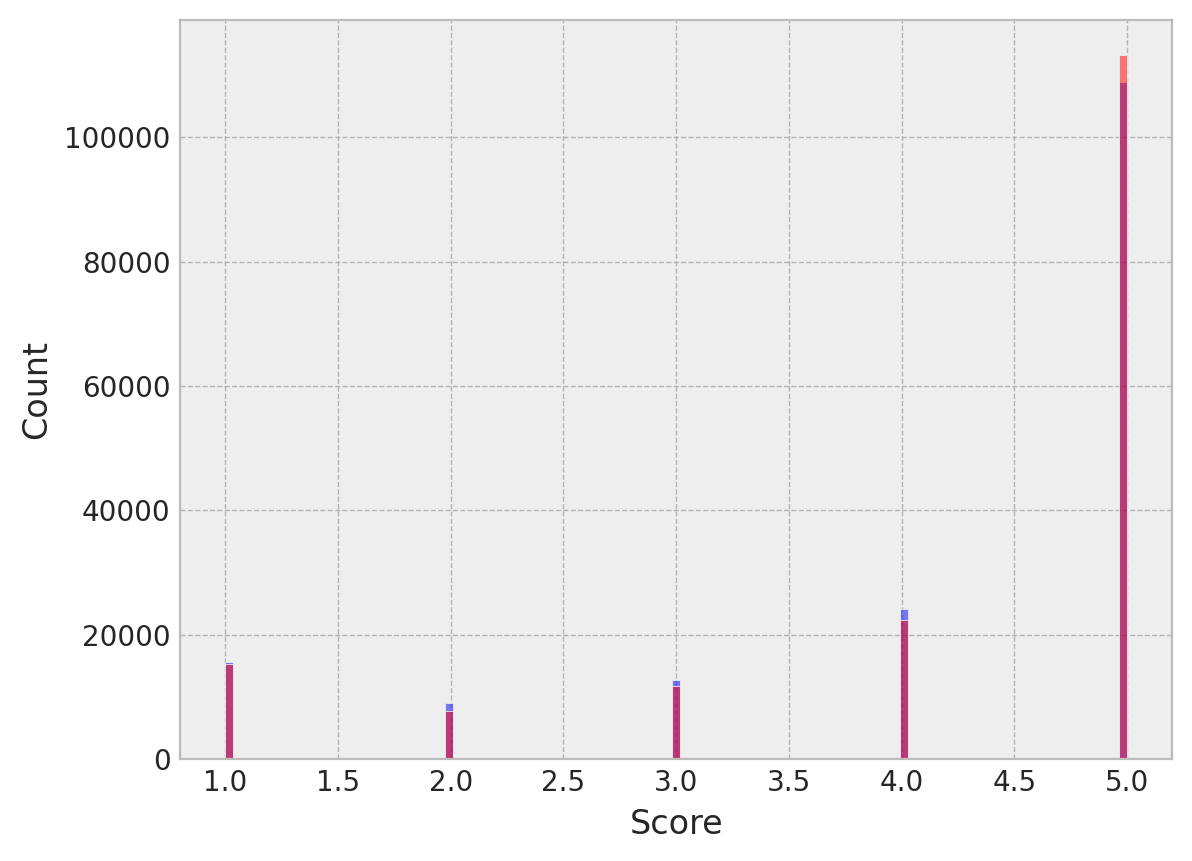

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred1, color='red', alpha=0.5);

In [ ]:
DT_ac = accuracy_score(y_test, y_test_pred1)

## **K-NearestNeighbors Classifier Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier()
classifier4.fit(X_train_bow, y_train) # Training the model and Building the model

KNeighborsClassifier()

In [ ]:
y_test_pred3 = classifier4.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred3)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred3))

0.6643543629828131
              precision    recall  f1-score   support

           1       0.51      0.42      0.46     15644
           2       0.41      0.31      0.35      9048
           3       0.44      0.32      0.37     12796
           4       0.39      0.38      0.39     24189
           5       0.77      0.83      0.80    108860

    accuracy                           0.66    170537
   macro avg       0.50      0.45      0.47    170537
weighted avg       0.65      0.66      0.65    170537



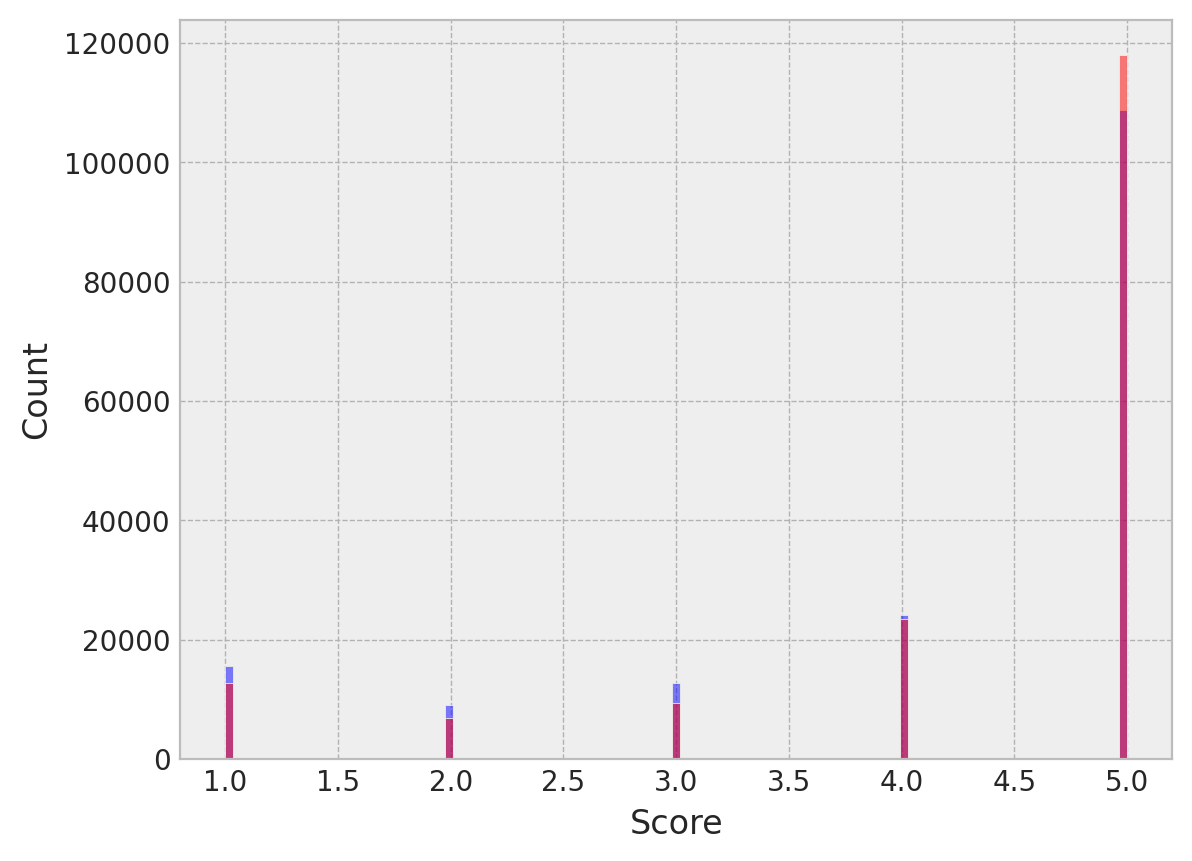

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred3, color='red', alpha=0.5);

In [ ]:
KN_ac = accuracy_score(y_test, y_test_pred3)

### **Random Forest Classifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train_bow, y_train)

RandomForestClassifier()

In [ ]:
y_test_pred2 = classifier3.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred2)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred2))

0.7905146683710866
              precision    recall  f1-score   support

           1       0.90      0.54      0.68     15644
           2       0.97      0.37      0.54      9048
           3       0.96      0.39      0.56     12796
           4       0.96      0.39      0.55     24189
           5       0.76      1.00      0.86    108860

    accuracy                           0.79    170537
   macro avg       0.91      0.54      0.64    170537
weighted avg       0.83      0.79      0.76    170537



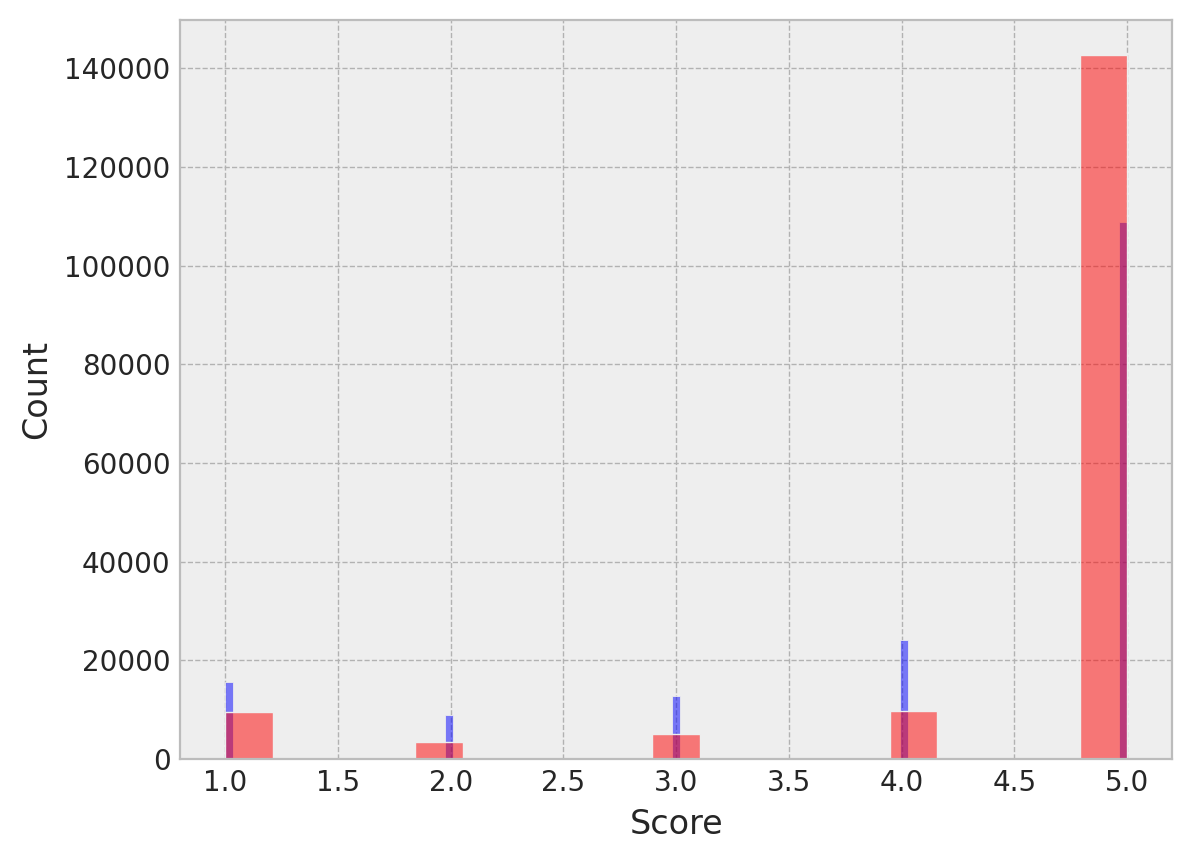

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred2, color='red', alpha=0.5);

In [ ]:
RF_ac = accuracy_score(y_test, y_test_pred2)

### **GradientBoostingClassifier Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clasifier5 = GradientBoostingClassifier()
clasifier5.fit(X_train_bow, y_train) # Training the model and Building the model

GradientBoostingClassifier()

In [ ]:
y_test_pred5= clasifier5.predict(X_test_bow) # Prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred5)) # Evaluating the model using the Evaluation metrics

print(classification_report(y_test, y_test_pred5))

0.6793364489817459
              precision    recall  f1-score   support

           1       0.72      0.28      0.40     15644
           2       0.56      0.05      0.09      9048
           3       0.49      0.08      0.14     12796
           4       0.51      0.11      0.18     24189
           5       0.69      0.99      0.81    108860

    accuracy                           0.68    170537
   macro avg       0.59      0.30      0.32    170537
weighted avg       0.64      0.68      0.59    170537



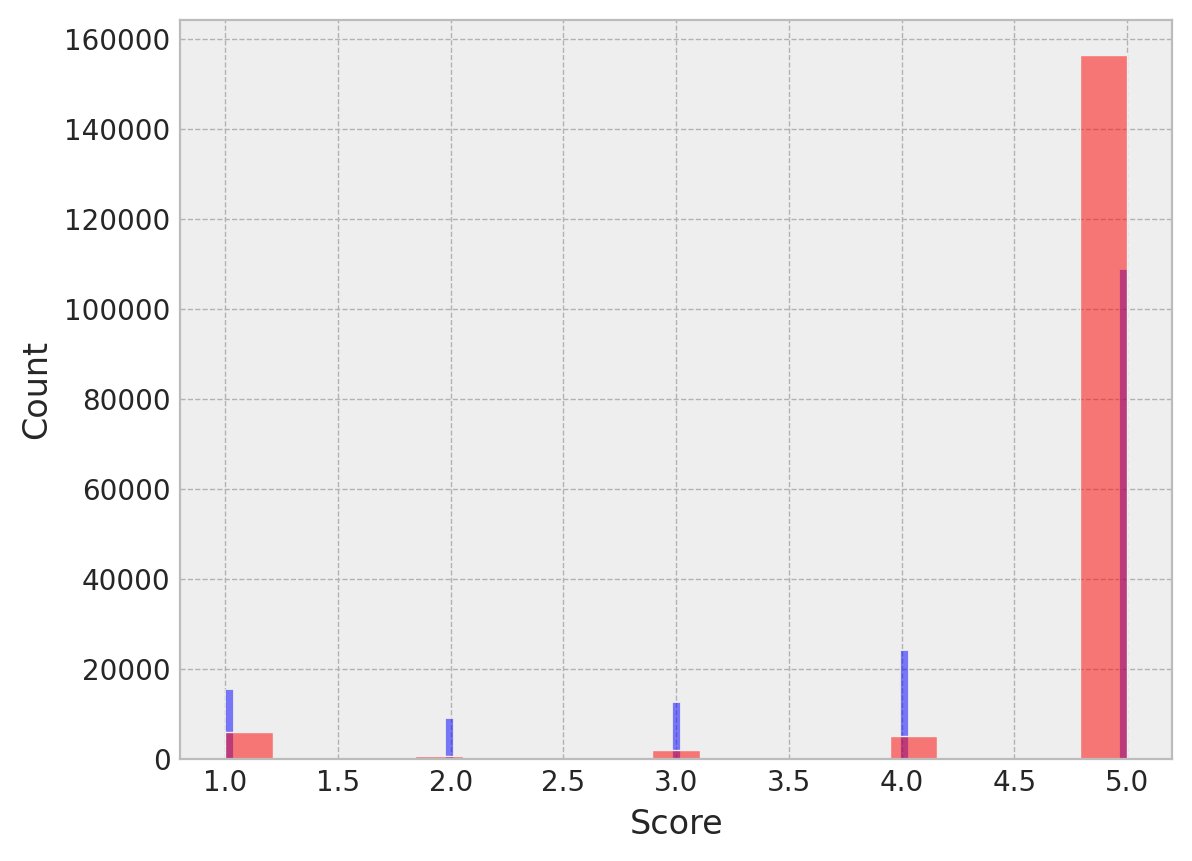

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred5, color='red', alpha=0.5);

In [ ]:
GBDT_ac = accuracy_score(y_test, y_test_pred5)

In [ ]:
dict1 = {'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier'],
                       'accuracy_score':[LR_ac,KN_ac,DT_ac,RF_ac,GBDT_ac]}

In [ ]:
df = pd.DataFrame(dict1)
df

,Model,accuracy_score
0,LogisticRegression,0.727948
1,KNeighborsClassifier,0.664354
2,DecisionTreeClassifier,0.744102
3,RandomForestClassifier,0.790515
4,GradientBoostingClassifier,0.679336


# **Conclusions:**



*   As we can conclude that, The Model Generated by RandomForestClassifier Algorithem is the best Model for the given Text Data - Sentiment Analysis project compared to all other models
*   The Evaluation matric - accuracy_score of RandomForestClassifier is high i.e., 0.7921624046394624, Thus it is clear that RandomForestClassifier has the best performance of all models.

*  The Outliers are not removed, they are re-scaled ,the models had been generated and evaluation is done.
*   The model we generated is light for deployment and has medium level latency.




